In [178]:
!git clone https://github.com/aashish-bidap/Give-Me-Some-Credit.git

fatal: destination path 'Give-Me-Some-Credit' already exists and is not an empty directory.


In [179]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df = pd.read_csv('Give-Me-Some-Credit/cs-training.csv').drop(columns=["Unnamed: 0"])

In [181]:
df.head()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                 1                              0.766127   45   
1                 0                              0.957151   40   
2                 0                              0.658180   38   
3                 0                              0.233810   30   
4                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [183]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Text(0.5, 1.0, 'Distribution of the Defaulters in the data')

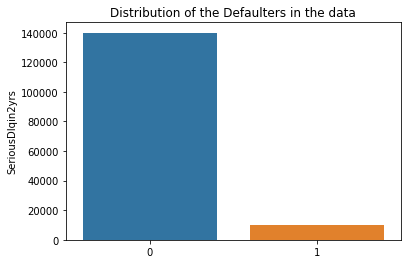

In [184]:
sns.barplot(x=df['SeriousDlqin2yrs'].value_counts().index,y=df['SeriousDlqin2yrs'].value_counts())
plt.title("Distribution of the Defaulters in the data")

<ipython-input-185-b11b29850ac1>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<Axes: >

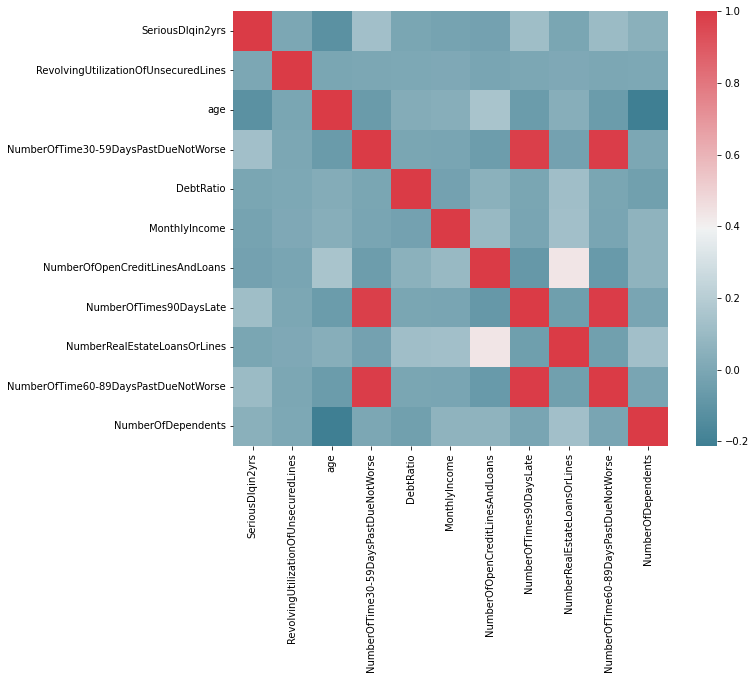

In [185]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [186]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,roc_curve

In [187]:
print(xgb.__version__)

1.7.4


In [188]:
y = df.loc[:,df.columns.isin(['SeriousDlqin2yrs'])]
X_attributes=[
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines',
       'NumberOfDependents'] # Excluding NumberOfTime60-89DaysPastDueNotWorse' because of strong collinearity
X = df.loc[:,df.columns.isin(X_attributes)]

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [190]:
X_test

RevolvingUtilizationOfUnsecuredLines  age  \
59770                               0.029690   57   
21362                               0.000000   57   
127324                              0.036569   48   
140509                              1.018331   41   
144297                              1.008799   49   
...                                      ...  ...   
30430                               1.000000   60   
63244                               0.053164   82   
104970                              0.967086   35   
53960                               0.013522   62   
49315                               0.035787   33   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
59770                                      0     0.283244        10121.0   
21362                                      0     0.142562         7750.0   
127324                                     0     0.236294         6000.0   
140509                                     0     0.163138         4958.0   
144297                                     0  3942.000000            NaN   
...                                      ...          ...            ...   
30430                                      0     3.000000            NaN   
63244                                      0     0.263518         2773.0   
104970                                     0     0.469314         3600.0   
53960                                      0     0.257847        10098.0   
49315                                      0     0.185247        17500.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
59770                                 7                        0   
21362                                 9                        0   
127324                                6                        0   
140509                                4                        0   
144297                               10                        0   
...                                 ...                      ...   
30430                                 0                        0   
63244                                 9                        0   
104970                                3                        0   
53960                                12                        0   
49315                                12                        0   

        NumberRealEstateLoansOrLines  NumberOfDependents  
59770                              1                 0.0  
21362                              1                 0.0  
127324                             2                 3.0  
140509                             0                 0.0  
144297                             1                 0.0  
...                              ...                 ...  
30430                              0                 0.0  
63244                              1                 0.0  
104970                             1                 0.0  
53960                              2                 0.0  
49315                              2                 2.0  

[30000 rows x 9 columns]

In [193]:
df = df.fillna(df.mean())

In [195]:
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [194]:
df.to_csv("data.csv", index=False)

# XGBOOST

In [70]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic",random_state=42)

In [71]:
xgb_model.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [72]:
y_pred = xgb_model.predict(X_test)
y_probab = xgb_model.predict_proba(X_test)

In [73]:
accuracy_score(y_pred,y_test)

0.9364

<Axes: >

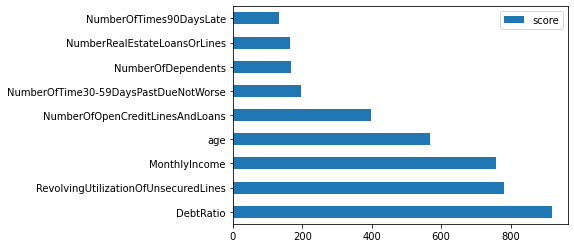

In [74]:
#Feature Importance Plot
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [75]:
def plot_roc(y_test,probs):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

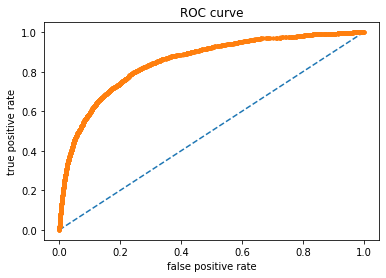

In [76]:
plot_roc(y_test,y_probab[:,1])

In [77]:
test = pd.read_csv('Give-Me-Some-Credit/cs-test.csv').drop(columns=["Unnamed: 0"])

In [78]:
test.isna().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [79]:
test.loc[test['MonthlyIncome'].isna(),'MonthlyIncome'] = test['MonthlyIncome'].dropna().median()
test.loc[test['NumberOfDependents'].isna(),'NumberOfDependents'] = test['NumberOfDependents'].dropna().mode()

In [80]:
test_proba = xgb_model.predict_proba(test.loc[:,test.columns.isin(X_attributes)])

In [81]:
df = pd.DataFrame({'Id':np.arange(1,len(test_proba)+1),'Probability':test_proba[:,1]})

In [82]:
df.sort_values(by=['Probability'],ascending=False)

Id  Probability
3149    3150     0.981526
40195  40196     0.965734
23492  23493     0.958443
57609  57610     0.956237
62622  62623     0.956000
...      ...          ...
74079  74080     0.000597
80002  80003     0.000596
12852  12853     0.000584
50553  50554     0.000565
38454  38455     0.000500

[101503 rows x 2 columns]

In [83]:
xgb_model.save_model('model.bst')

## Gradio

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import shap
import matplotlib.pyplot as plt

explainer   = shap.TreeExplainer(xgb_model)

def update(d):
    hasil = xgb_model.predict_proba(d)
    return {">50K": float(hasil[:,1][0]), "<=50K": 1 - float(hasil[:,1][0])}

def inters(*data):
    d = np.array([data])
    shap_values = explainer.shap_values(d)
    scores_desc = list(zip(shap_values[0], X_train.columns))
    scores_desc = sorted(scores_desc)
    fig_m = plt.figure(tight_layout=True)
    plt.barh([s[1] for s in scores_desc], [s[0] for s in scores_desc])
    plt.title("Feature Shap Values")
    plt.ylabel("Shap Value")
    plt.xlabel("Feature")
    plt.tight_layout()
    label = update(d)
    return fig_m,label

with gr.Blocks() as demo:
    gr.Markdown("Start typing below and then click **Run** to see the output.")
    with gr.Row():
      with gr.Column(scale=2):
        label = gr.Label()
        utlili   = gr.Slider(label="Revolving Utilization Of Unsecured Lines", minimum=0, maximum=51000, step=0.00001, randomize=True)
        age      = gr.Slider(label="Age", minimum=0, maximum=110, step=1, randomize=True)
        m_income = gr.Slider(label="Monthly Income", minimum=0, maximum=3009000, step=1, randomize=True)
        n_times  = gr.Slider(label="Number Of Times 90 Days Late", minimum=0, maximum=100, step=1, randomize=True)
        n_dep    = gr.Slider(label="Number Of Dependents", minimum=0, maximum=20, step=1, randomize=True)
      with gr.Column(scale=2):
        plot  = gr.Plot()
        number   = gr.Slider(label="Number Of Time 30-59 Days Past Due Not Worse", minimum=0, maximum=100, step=0.00001, randomize=True)
        ratio    = gr.Slider(label="Debt Ratio", minimum=0, maximum=330000, step=0.00001, randomize=True)
        n_credit = gr.Slider(label="Number Of Open Credit Lines And Loans", minimum=0, maximum=60, step=1, randomize=True)
        r_estate = gr.Slider(label="Number Real Estate Loans Or Lines", minimum=0, maximum=60, step=1, randomize=True)
        btn = gr.Button("Run")
    btn.click(fn=inters, inputs=[
       utlili, age, number, ratio, m_income,
       n_credit, n_times,r_estate,n_dep], outputs=[plot,label])

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

# Tensorflow

In [ ]:
df = df.fillna(df.mean())

In [ ]:
y = df.loc[:,df.columns.isin(['SeriousDlqin2yrs'])]
X_attributes=[
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines',
       'NumberOfDependents'] # Excluding NumberOfTime60-89DaysPastDueNotWorse' because of strong collinearity
X = df.loc[:,df.columns.isin(X_attributes)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu',input_shape=(X_train.shape[1],)),
  tf.keras.layers.Normalization(),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

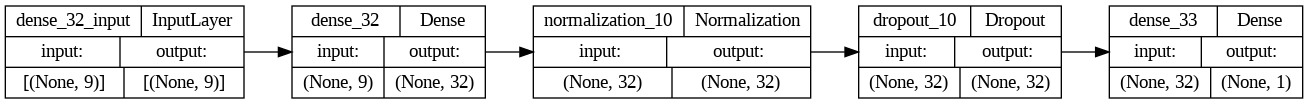

In [ ]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),batch_size=32,
          epochs=3)

Epoch 1/3
3750/3750 [==============================] - 9s 2ms/step - loss: 90.6322 - accuracy: 0.8551 - val_loss: 13.7075 - val_accuracy: 0.9349
Epoch 2/3
3750/3750 [==============================] - 10s 3ms/step - loss: 2.0154 - accuracy: 0.9011 - val_loss: 0.2640 - val_accuracy: 0.9347
Epoch 3/3
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3168 - accuracy: 0.9302 - val_loss: 0.2502 - val_accuracy: 0.9351


In [ ]:
def predict_prob(number):
  return [number[0],1-number[0]]
  
y_pred = model.predict(X_test)

y_prob = np.array(list(map(predict_prob, model.predict(X_test))))
y_prob 

In [ ]:
def plot_roc(y_test,probs):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

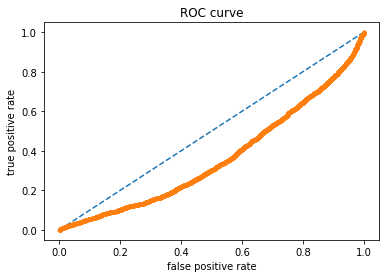

In [ ]:
plot_roc(y_test,y_prob[:,1])

In [ ]:
test = pd.read_csv('Give-Me-Some-Credit/cs-test.csv').drop(columns=["Unnamed: 0"])

In [ ]:
test = test.fillna(test.mean())

In [ ]:
test_proba = np.array(list(map(predict_prob, model.predict(test.loc[:,test.columns.isin(X_attributes)]))))

3172/3172 [==============================] - 12s 4ms/step


In [ ]:
test_proba

array([[0.03614391, 0.96385609],
       [0.01062063, 0.98937937],
       [0.03225116, 0.96774884],
       ...,
       [0.03339095, 0.96660905],
       [0.0503951 , 0.9496049 ],
       [0.03912902, 0.96087098]])

In [ ]:
df = pd.DataFrame({'Id':np.arange(1,len(test_proba)+1),'Probability':test_proba[:,1]})

In [ ]:
test

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                    0.0                              0.885519   43   
1                    0.0                              0.463295   57   
2                    0.0                              0.043275   59   
3                    0.0                              0.280308   38   
4                    0.0                              1.000000   27   
...                  ...                                   ...  ...   
101498               0.0                              0.282653   24   
101499               0.0                              0.922156   36   
101500               0.0                              0.081596   70   
101501               0.0                              0.335457   56   
101502               0.0                              0.441842   29   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                          0     0.177513         5700.0   
1                                          0     0.527237         9141.0   
2                                          0     0.687648         5083.0   
3                                          1     0.925961         3200.0   
4                                          0     0.019917         3865.0   
...                                      ...          ...            ...   
101498                                     0     0.068522         1400.0   
101499                                     3     0.934217         7615.0   
101500                                     0   836.000000            0.0   
101501                                     0  3568.000000            0.0   
101502                                     0     0.198918         5916.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                     4                        0   
1                                    15                        0   
2                                    12                        0   
3                                     7                        0   
4                                     4                        0   
...                                 ...                      ...   
101498                                5                        0   
101499                                8                        0   
101500                                3                        0   
101501                                8                        0   
101502                               12                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                                  0                                     0   
1                                  4                                     0   
2                                  1                                     0   
3                                  2                                     0   
4                                  0                                     0   
...                              ...                                   ...   
101498                             0                                     0   
101499                             2                                     0   
101500                             0                                     0   
101501                             2                                     1   
101502                             0                                     0   

        NumberOfDependents  
0                      0.0  
1                      2.0  
2                      2.0  
3                      0.0  
4                      1.0  
...                    ...  
101498                 0.0  
101499                 4.0  
101500                 0.0  
101501                 3.0  
101502                 0.0  

[101503 rows x 11 columns]

## Gradio

In [ ]:
!pip install gradio
!pip install shap

In [ ]:
import gradio as gr
import shap
import matplotlib.pyplot as plt

explainer   = shap.DeepExplainer(model, X_train.values)

def update(d):
    hasil = np.array(list(map(predict_prob, model.predict(d))))
    return {">50K": hasil[:,1][0], "<=50K": 1 - hasil[:,1][0]}

def inters(*data):
    d = np.array([data])
    shap_values = explainer.shap_values(d)
    fig_m = plt.figure(tight_layout=True)
    shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = X_train.columns)
    plt.tight_layout()
    label = update(d)
    return fig_m,label

with gr.Blocks() as demo:
    gr.Markdown("Start typing below and then click **Run** to see the output.")
    label = gr.Label()
    plot  = gr.Plot()
    with gr.Row():
      with gr.Column(scale=2):
        utlili   = gr.Slider(label="Revolving Utilization Of Unsecured Lines", minimum=0, maximum=51000, step=0.00001, randomize=True)
        age      = gr.Slider(label="Age", minimum=0, maximum=110, step=1, randomize=True)
        m_income = gr.Slider(label="Monthly Income", minimum=0, maximum=3009000, step=1, randomize=True)
        n_times  = gr.Slider(label="Number Of Times 90 Days Late", minimum=0, maximum=100, step=1, randomize=True)
        n_dep    = gr.Slider(label="Number Of Dependents", minimum=0, maximum=20, step=1, randomize=True)
      with gr.Column(scale=2):
        number   = gr.Slider(label="Number Of Time 30-59 Days Past Due Not Worse", minimum=0, maximum=100, step=0.00001, randomize=True)
        ratio    = gr.Slider(label="Debt Ratio", minimum=0, maximum=330000, step=0.00001, randomize=True)
        n_credit = gr.Slider(label="Number Of Open Credit Lines And Loans", minimum=0, maximum=60, step=1, randomize=True)
        r_estate = gr.Slider(label="Number Real Estate Loans Or Lines", minimum=0, maximum=60, step=1, randomize=True)
        btn = gr.Button("Run")
    btn.click(fn=inters, inputs=[
       utlili, age, number, ratio, m_income,
       n_credit, n_times,r_estate,n_dep], outputs=[plot,label])

demo.launch()

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

# Call Endpoint

In [203]:
 X_attributes=[
        'RevolvingUtilizationOfUnsecuredLines', 'age',
        'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
        'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
        'NumberRealEstateLoansOrLines',
        'NumberOfDependents']

In [207]:
df.loc[:,df.columns.isin(X_attributes)]

RevolvingUtilizationOfUnsecuredLines  age  \
0                                   0.766127   45   
1                                   0.957151   40   
2                                   0.658180   38   
3                                   0.233810   30   
4                                   0.907239   49   
...                                      ...  ...   
149995                              0.040674   74   
149996                              0.299745   44   
149997                              0.246044   58   
149998                              0.000000   30   
149999                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                          2     0.802982    9120.000000   
1                                          0     0.121876    2600.000000   
2                                          1     0.085113    3042.000000   
3                                          0     0.036050    3300.000000   
4                                          1     0.024926   63588.000000   
...                                      ...          ...            ...   
149995                                     0     0.225131    2100.000000   
149996                                     0     0.716562    5584.000000   
149997                                     0  3870.000000    6670.221237   
149998                                     0     0.000000    5716.000000   
149999                                     0     0.249908    8158.000000   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                    13                        0   
1                                     4                        0   
2                                     2                        1   
3                                     5                        0   
4                                     7                        0   
...                                 ...                      ...   
149995                                4                        0   
149996                                4                        0   
149997                               18                        0   
149998                                4                        0   
149999                                8                        0   

        NumberRealEstateLoansOrLines  NumberOfDependents  
0                                  6                 2.0  
1                                  0                 1.0  
2                                  0                 0.0  
3                                  0                 0.0  
4                                  1                 0.0  
...                              ...                 ...  
149995                             1                 0.0  
149996                             1                 2.0  
149997                             1                 0.0  
149998                             0                 0.0  
149999                             2                 0.0  

[150000 rows x 9 columns]

In [196]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
!pip install google-cloud-aiplatform

In [ ]:
!pip install explainable_ai_sdk

In [201]:
from google.cloud import aiplatform
from google.cloud import bigquery, bigquery_storage, storage

project="773074608161"
endpoint_id="487268369058234368"
location="asia-southeast2"

aiplatform.init(
        # your Google Cloud Project ID or number
        project=project,

        # the Vertex AI region you will use
        location=location)

endpoint = aiplatform.Endpoint(endpoint_id)

In [238]:
type(endpoint.predict(instances=[X_test.iloc[:,:-1].values.tolist()[0]])[0][0])

float

In [242]:
def predict_prob(number):
  return [number,1-number]

In [243]:
predict_prob(float(endpoint.predict(instances=[X_test.iloc[:,:-1].values.tolist()[0]])[0][0]))

[0.1321828663349152, 0.8678171336650848]